In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CaseFile = pd.read_csv('covid_19_india.csv')
CaseFile
CaseFile.rename(columns={'State/UnionTerritory':'State'},inplace=True)

In [4]:
case_df = pd.DataFrame(CaseFile)
case_df

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [5]:
list1 = ["Maharashtra", "Delhi", "Karnataka", "West Bengal","Tamil Nadu", "Telangana"]

In [6]:
case_df = case_df[case_df.State.isin(list1) == True]

In [7]:
case_df.reset_index(drop=True, inplace=True)
case_df = case_df.drop(['Sno'], axis=1)
case_df

,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-03-02,6:00 PM,Delhi,1,0,0,0,1
1,2020-03-03,6:00 PM,Delhi,1,0,0,0,1
2,2020-03-04,6:00 PM,Delhi,1,0,0,0,1
3,2020-03-05,6:00 PM,Delhi,2,0,0,0,2
4,2020-03-06,6:00 PM,Delhi,3,0,0,0,3
...,...,...,...,...,...,...,...,...
2700,2021-08-11,8:00 AM,Karnataka,-,-,2861499,36848,2921049
2701,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442
2702,2021-08-11,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130
2703,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353


In [8]:
case_df["Daily_count"] = case_df["Confirmed"] - case_df["Deaths"] - case_df["Cured"]

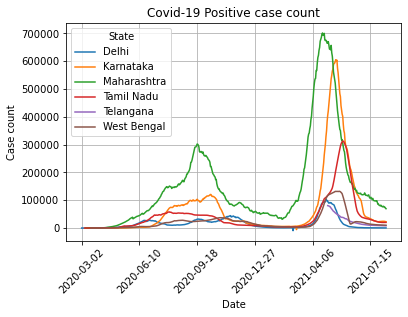

In [12]:
Positive_cases = case_df.pivot("Date","State","Daily_count").plot()
plt.xticks(rotation = 45)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Case count")
plt.title("Covid-19 Positive case count")
Positive_cases.figure.savefig('Positive_cases.jpg')

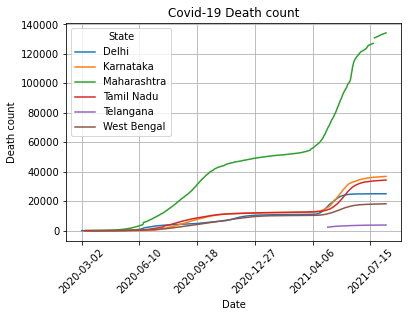

In [13]:
Deaths = case_df.pivot("Date","State","Deaths").plot()
plt.xticks(rotation = 45)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Death count")
plt.title("Covid-19 Death count")
Deaths.figure.savefig('Deaths.jpg')